<a href="https://colab.research.google.com/github/AnndyLibeMoore/Catalogo/blob/main/Covid19_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid_19 Analisis

En el siguiente proyecto tomando como punto de partida dos bases de datos oficiales como lo son Datos del Covid a nivel mundial de WHO(World Health Organization) y  World Population Prospects de las Naciones Unidas, analizaremos el efecto del Covid destacando los países más afectados y enfocandonos en Corea del Sur.

Con este análisis se busca obtener datos de contagios y de letalidad incluso a comparación de otros países, asi yendo más a fondo podremos incluso tener en cuenta qué hizo Corea en el tratamiento y contención de este virus. ¿Podria esto significar que estarian preparados para contener y tratar otra pandemia de tal similitud, tienen algo que aprender de Corea otros paises?.

In [100]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import requests
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor
import datetime




In [101]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


In [102]:
#Descargamos las bases de datos que usaremos

#EDA

In [4]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

display(df_covid.head())
display(df_population.tail())

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
20305,20306,Estimates,Samoa,NaN,882,WSM,WS,882.0,Country/Area,957,...,199.759,133.625,68.304,81.648,53.949,148.134,178.682,114.303,-2.469,-11.584
20377,20378,Estimates,Tokelau,35,772,TKL,TK,772.0,Country/Area,957,...,141.052,142.411,63.07,58.218,68.146,133.511,132.832,134.951,0.113,66.637
20449,20450,Estimates,Tonga,NaN,776,TON,TO,776.0,Country/Area,957,...,245.689,169.545,97.746,114.797,81.702,194.945,232.709,156.813,-1.898,-17.923
20521,20522,Estimates,Tuvalu,NaN,798,TUV,TV,798.0,Country/Area,957,...,404.852,239.933,174.791,218.086,122.296,308.753,384.691,217.301,-0.057,-5.188
20593,20594,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,77.781,80.136,24.304,22.291,25.981,66.639,69.324,64.496,-0.171,-14.489


#EDA Base Covid World Health Organization

In [5]:
df_covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
51115,2023-12-31,ZW,Zimbabwe,AFRO,NaN,266048,NaN,5731
51116,2024-01-07,ZW,Zimbabwe,AFRO,46.0,266094,3.0,5734
51117,2024-01-14,ZW,Zimbabwe,AFRO,85.0,266179,3.0,5737
51118,2024-01-21,ZW,Zimbabwe,AFRO,55.0,266234,NaN,5737


In [6]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      51120 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            51120 non-null  object 
 3   WHO_region         47286 non-null  object 
 4   New_cases          36698 non-null  float64
 5   Cumulative_cases   51120 non-null  int64  
 6   New_deaths         24249 non-null  float64
 7   Cumulative_deaths  51120 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [7]:
#eliminación de filas donde el valor en la columna 'Country_code' es nulo:
df_covid = df_covid.dropna(subset=['Country_code'])


In [8]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50907 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50907 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            50907 non-null  object 
 3   WHO_region         47073 non-null  object 
 4   New_cases          36523 non-null  float64
 5   Cumulative_cases   50907 non-null  int64  
 6   New_deaths         24128 non-null  float64
 7   Cumulative_deaths  50907 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [9]:
df_covid['Country_code'].isnull().sum()

0

In [10]:
#Eliminamos la columna WHO_region pues no la usaremos
df_covid.drop('WHO_region', axis=1, inplace=True)


In [11]:
df_covid.head(10)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,NaN,0,NaN,0
5,2020-02-09,AF,Afghanistan,NaN,0,NaN,0
6,2020-02-16,AF,Afghanistan,NaN,0,NaN,0
7,2020-02-23,AF,Afghanistan,NaN,0,NaN,0
8,2020-03-01,AF,Afghanistan,1.0,1,NaN,0
9,2020-03-08,AF,Afghanistan,NaN,1,NaN,0


In [12]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50907 entries, 0 to 51119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50907 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            50907 non-null  object 
 3   New_cases          36523 non-null  float64
 4   Cumulative_cases   50907 non-null  int64  
 5   New_deaths         24128 non-null  float64
 6   Cumulative_deaths  50907 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ MB


In [13]:
#sustituimos los valores nulos con 0
df_covid.fillna(0, inplace=True)



In [14]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50907 entries, 0 to 51119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50907 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            50907 non-null  object 
 3   New_cases          50907 non-null  float64
 4   Cumulative_cases   50907 non-null  int64  
 5   New_deaths         50907 non-null  float64
 6   Cumulative_deaths  50907 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ MB


In [15]:
#verificamos qué tipo es la columna Date_reported
df_covid["Date_reported"].dtype

dtype('O')

In [16]:
#cambiamso el formatoa datetime64
df_covid["Date_reported"] = df_covid["Date_reported"].astype("datetime64[ns]")


In [17]:
df_covid["Date_reported"].dtype

dtype('<M8[ns]')

In [18]:
##el siguiente tratamiento de columnas se hace puesto que tenemos datos infinitos o que se han representado
# con "...", asi que el errors=coerce, lo convierte en Nan y puedo convertirlo a int64

In [19]:
df_covid['New_cases']= pd.to_numeric(df_covid['New_cases'], errors='coerce').astype(int)

print(df_covid['New_cases'].dtype)

int64


In [20]:
df_covid['New_deaths']= pd.to_numeric(df_covid['New_deaths'], errors='coerce').astype(int)

print(df_covid['New_deaths'].dtype)

int64


In [21]:
#creamos la columna lethality_rate que calculara la letalidad y usamos
# muertes acumuladas dividad sobre casos acumulados * 100
df_covid['lethality_rate'] = (df_covid['Cumulative_deaths'] / df_covid['Cumulative_cases']) * 100


In [22]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50907 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      50907 non-null  datetime64[ns]
 1   Country_code       50907 non-null  object        
 2   Country            50907 non-null  object        
 3   New_cases          50907 non-null  int64         
 4   Cumulative_cases   50907 non-null  int64         
 5   New_deaths         50907 non-null  int64         
 6   Cumulative_deaths  50907 non-null  int64         
 7   lethality_rate     46533 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.5+ MB


In [23]:
#como vemos tenemos nulos en lethality rate, para ello haremos un tratamiento
#de outliers

In [24]:
df_covid

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,NaN
1,2020-01-12,AF,Afghanistan,0,0,0,0,NaN
2,2020-01-19,AF,Afghanistan,0,0,0,0,NaN
3,2020-01-26,AF,Afghanistan,0,0,0,0,NaN
4,2020-02-02,AF,Afghanistan,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
51115,2023-12-31,ZW,Zimbabwe,0,266048,0,5731,2.154123
51116,2024-01-07,ZW,Zimbabwe,46,266094,3,5734,2.154878
51117,2024-01-14,ZW,Zimbabwe,85,266179,3,5737,2.155317
51118,2024-01-21,ZW,Zimbabwe,55,266234,0,5737,2.154871


<Axes: >

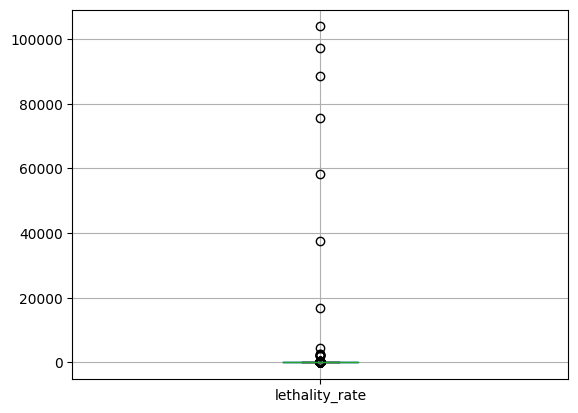

In [25]:
df_covid.boxplot(['lethality_rate'])


In [26]:
#Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se
# encuentre entre los cuantiles 0 a 0.99

quantile_0 = df_covid['lethality_rate'].quantile(0)
quantile_99 = df_covid['lethality_rate'].quantile(0.99)

# Filtrar los registros
df_covid = df_covid[(df_covid['lethality_rate'] >= quantile_0) & (df_covid['lethality_rate'] <= quantile_99)]

<Axes: >

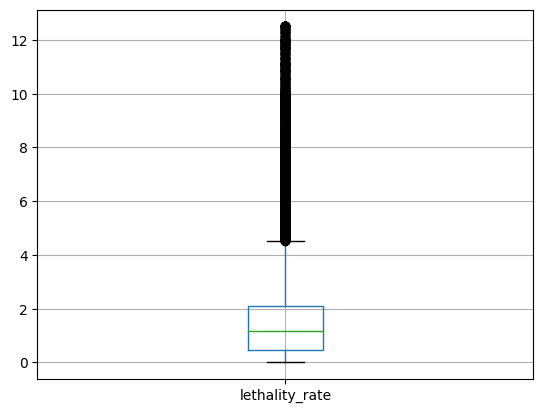

In [27]:
#aqui ya podemos ver la diferencia entre la gráfica anterios y esta q ya se trato
#los outliers
df_covid.boxplot(['lethality_rate'])


In [28]:
df_covid

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
8,2020-03-01,AF,Afghanistan,1,1,0,0,0.000000
9,2020-03-08,AF,Afghanistan,0,1,0,0,0.000000
10,2020-03-15,AF,Afghanistan,6,7,0,0,0.000000
11,2020-03-22,AF,Afghanistan,17,24,0,0,0.000000
12,2020-03-29,AF,Afghanistan,67,91,2,2,2.197802
...,...,...,...,...,...,...,...,...
51115,2023-12-31,ZW,Zimbabwe,0,266048,0,5731,2.154123
51116,2024-01-07,ZW,Zimbabwe,46,266094,3,5734,2.154878
51117,2024-01-14,ZW,Zimbabwe,85,266179,3,5737,2.155317
51118,2024-01-21,ZW,Zimbabwe,55,266234,0,5737,2.154871


In [29]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46067 entries, 8 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      46067 non-null  datetime64[ns]
 1   Country_code       46067 non-null  object        
 2   Country            46067 non-null  object        
 3   New_cases          46067 non-null  int64         
 4   Cumulative_cases   46067 non-null  int64         
 5   New_deaths         46067 non-null  int64         
 6   Cumulative_deaths  46067 non-null  int64         
 7   lethality_rate     46067 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.2+ MB


In [30]:
#cómo vemos ya no tenemso valores nulor ni outliers pero hemos perdido
#muchos datos, sin embargo trabajaremos con los que tenmos

In [31]:
#filtramos para eliminar valores negativos
df_covid = df_covid[df_covid['New_cases'] >= 0]
df_covid = df_covid[df_covid['New_deaths'] >= 0]

In [32]:
df_covid

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
8,2020-03-01,AF,Afghanistan,1,1,0,0,0.000000
9,2020-03-08,AF,Afghanistan,0,1,0,0,0.000000
10,2020-03-15,AF,Afghanistan,6,7,0,0,0.000000
11,2020-03-22,AF,Afghanistan,17,24,0,0,0.000000
12,2020-03-29,AF,Afghanistan,67,91,2,2,2.197802
...,...,...,...,...,...,...,...,...
51115,2023-12-31,ZW,Zimbabwe,0,266048,0,5731,2.154123
51116,2024-01-07,ZW,Zimbabwe,46,266094,3,5734,2.154878
51117,2024-01-14,ZW,Zimbabwe,85,266179,3,5737,2.155317
51118,2024-01-21,ZW,Zimbabwe,55,266234,0,5737,2.154871


In [33]:
#nuestro dataframe final esta limpio, hemos eliminado al rededor de 5k
#de datos inconclusos, erroneos ó nulos, veremos ahora cómo ha quedado

df_covid_limpio = df_covid.copy()

df_covid_limpio.reset_index(drop=True, inplace=True)

print(df_covid_limpio)


      Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-03-01           AF  Afghanistan          1                 1   
1        2020-03-08           AF  Afghanistan          0                 1   
2        2020-03-15           AF  Afghanistan          6                 7   
3        2020-03-22           AF  Afghanistan         17                24   
4        2020-03-29           AF  Afghanistan         67                91   
...             ...          ...          ...        ...               ...   
46035    2023-12-31           ZW     Zimbabwe          0            266048   
46036    2024-01-07           ZW     Zimbabwe         46            266094   
46037    2024-01-14           ZW     Zimbabwe         85            266179   
46038    2024-01-21           ZW     Zimbabwe         55            266234   
46039    2024-01-28           ZW     Zimbabwe         31            266265   

       New_deaths  Cumulative_deaths  lethality_rate  
0       

In [34]:
df_covid_limpio

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-03-01,AF,Afghanistan,1,1,0,0,0.000000
1,2020-03-08,AF,Afghanistan,0,1,0,0,0.000000
2,2020-03-15,AF,Afghanistan,6,7,0,0,0.000000
3,2020-03-22,AF,Afghanistan,17,24,0,0,0.000000
4,2020-03-29,AF,Afghanistan,67,91,2,2,2.197802
...,...,...,...,...,...,...,...,...
46035,2023-12-31,ZW,Zimbabwe,0,266048,0,5731,2.154123
46036,2024-01-07,ZW,Zimbabwe,46,266094,3,5734,2.154878
46037,2024-01-14,ZW,Zimbabwe,85,266179,3,5737,2.155317
46038,2024-01-21,ZW,Zimbabwe,55,266234,0,5737,2.154871


In [35]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46040 entries, 0 to 46039
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      46040 non-null  datetime64[ns]
 1   Country_code       46040 non-null  object        
 2   Country            46040 non-null  object        
 3   New_cases          46040 non-null  int64         
 4   Cumulative_cases   46040 non-null  int64         
 5   New_deaths         46040 non-null  int64         
 6   Cumulative_deaths  46040 non-null  int64         
 7   lethality_rate     46040 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.8+ MB


In [36]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.604000e+04,4.604000e+04,46040.000000,4.604000e+04,46040.000000
mean,1.677604e+04,1.778958e+06,146.987489,2.074399e+04,1.564123
std,2.494141e+05,7.564154e+06,893.448084,8.209538e+04,1.651016
min,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.000000e+00,7.305000e+03,0.000000,6.100000e+01,0.474011
50%,1.490000e+02,6.096300e+04,1.000000,7.095000e+02,1.150220
75%,2.426250e+03,5.988402e+05,24.000000,7.626000e+03,2.095808
max,4.047548e+07,1.034368e+08,47687.000000,1.170784e+06,12.500000


In [37]:
#veremos algunas gráficas estadisticas para asegurarnos de que los datos
#tratados muestren una lógica estadistica aceptable.

<Axes: >

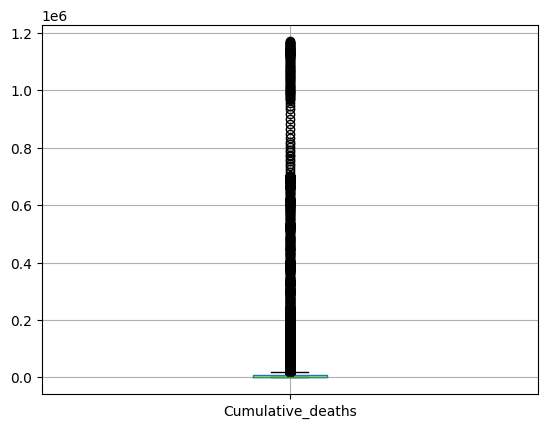

In [38]:
df_covid.boxplot(['Cumulative_deaths'])


<Axes: >

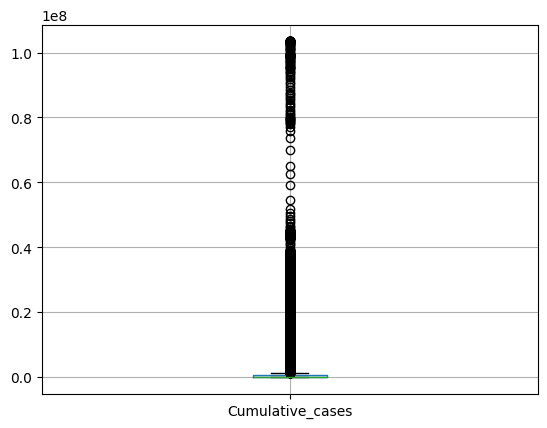

In [39]:
df_covid.boxplot(['Cumulative_cases'])


<Axes: >

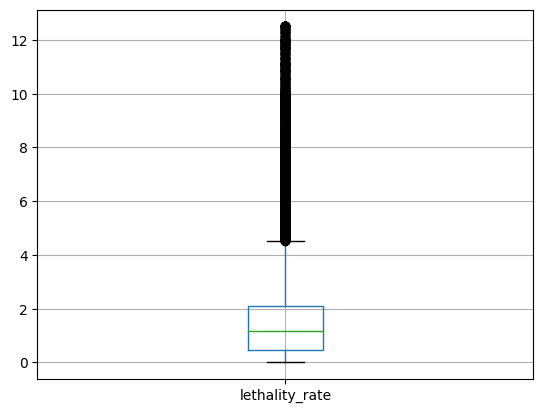

In [40]:
df_covid.boxplot(['lethality_rate'])


In [41]:
df_covid_limpio['lethality_rate']


0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        2.197802
           ...   
46035    2.154123
46036    2.154878
46037    2.155317
46038    2.154871
46039    2.154620
Name: lethality_rate, Length: 46040, dtype: float64

#EDA Base Population United Nations

In [42]:
#Bien, ahora trataremos la siguiente Base de datos, la de población

df_population.head(5)

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235
286,287,Estimates,Central and Southern Asia,NaN,1831,NaN,NaN,62.0,SDG region,1828,...,227.047,168.558,75.217,90.827,58.668,161.773,190.486,131.231,-2473.484,-1.223
358,359,Estimates,Eastern and South-Eastern Asia,NaN,1832,NaN,NaN,753.0,SDG region,1828,...,145.643,86.283,47.004,58.936,34.318,100.287,128.133,71.208,-99.778,-0.043


In [43]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-c

In [44]:
print(type(df_population))


<class 'pandas.core.frame.DataFrame'>


In [45]:
#esta base es muy amplia asi que filtramos solo las columnas elegidas
df_population = df_population[['ISO2 Alpha-code','Median Age, as of 1 July (years)','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']]


In [46]:
df_population

,ISO2 Alpha-code,"Median Age, as of 1 July (years)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)"
69,NaN,29.469,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,17.42,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,25.267,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,25.901,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,35.37,2324282.002,1176368.32,1147913.681,143.117,77.013
...,...,...,...,...,...,...,...
20305,WS,20.412,211.905,108.147,103.759,74.878,72.157
20377,TK,26.398,1.752,0.879,0.874,146,75.076
20449,TO,21.259,104.951,51.994,52.956,161.462,70.871
20521,TV,24.729,10.956,5.654,5.301,365.2,64.278


In [47]:
#renombramos las columnas
df_population.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Median Age, as of 1 July (years)' : 'Edad_Media',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
}, inplace=True)

In [48]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Edad_Media          286 non-null    object
 2   Total_Population    286 non-null    object
 3   Male_Population     286 non-null    object
 4   Female_Population   286 non-null    object
 5   Population_Density  286 non-null    object
 6   Life_Expectancy     286 non-null    object
dtypes: object(7)
memory usage: 17.9+ KB


In [49]:
#eliminamos nulos
df_population = df_population.dropna(subset=['Country_code'])



In [50]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Edad_Media          236 non-null    object
 2   Total_Population    236 non-null    object
 3   Male_Population     236 non-null    object
 4   Female_Population   236 non-null    object
 5   Population_Density  236 non-null    object
 6   Life_Expectancy     236 non-null    object
dtypes: object(7)
memory usage: 14.8+ KB


In [51]:
df_population

,Country_code,Edad_Media,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,15.308,11874.838,5894.278,5980.56,457.605,62.351
1873,KM,19.613,790.986,397.126,393.86,425.033,64.068
1945,DJ,23.235,1073.994,533.626,540.367,46.333,63.085
2017,ER,17.781,3498.818,1724.86,1773.958,28.881,67.3
2089,ET,18.072,114120.594,57375.433,56745.161,114.121,65.838
...,...,...,...,...,...,...,...
20305,WS,20.412,211.905,108.147,103.759,74.878,72.157
20377,TK,26.398,1.752,0.879,0.874,146,75.076
20449,TO,21.259,104.951,51.994,52.956,161.462,70.871
20521,TV,24.729,10.956,5.654,5.301,365.2,64.278


In [52]:
#ahora enecesitamos convertir a int las columnas que son numericas, sin embargo en nuestro df tenemos algunos registros que no son ni numericos
#ni texto pues aparecen '...' y ese no es un dato valido ni que podamos convertir, por ello debos tratarlo

In [53]:
#encontramos esos registros, iterando todas las columnas en busca de ellos
for columna in df_population.columns:
    # Encuentra los registros que contienen el valor no válido en la columna actual
    registros_invalidos = df_population[df_population[columna] == '...']

    # Si se encontraron registros inválidos en la columna actual, imprime la columna y los registros
    if not registros_invalidos.empty:
        print(f"Registros inválidos encontrados en la columna '{columna}':")
        print(registros_invalidos)

Registros inválidos encontrados en la columna 'Edad_Media':
      Country_code Edad_Media Total_Population Male_Population  \
12817           VA        ...            0.528             ...   

      Female_Population Population_Density Life_Expectancy  
12817               ...               1200             ...  
Registros inválidos encontrados en la columna 'Male_Population':
      Country_code Edad_Media Total_Population Male_Population  \
12817           VA        ...            0.528             ...   

      Female_Population Population_Density Life_Expectancy  
12817               ...               1200             ...  
Registros inválidos encontrados en la columna 'Female_Population':
      Country_code Edad_Media Total_Population Male_Population  \
12817           VA        ...            0.528             ...   

      Female_Population Population_Density Life_Expectancy  
12817               ...               1200             ...  
Registros inválidos encontrados en la colum

In [54]:
#bien aqui usamos el método de pandas to_numeric() que nos provee manejo de éste tipo de errores
#El parámetro errors, indica qué hacer en caso de encontrar un valor no numérico.
#El valor coerce, reemplazará los strings no identificados como números por NaN

columnas = ['Edad_Media','Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_population[columnas] = df_population[columnas].apply(pd.to_numeric, errors='coerce')
df_population.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        236 non-null    object 
 1   Edad_Media          235 non-null    float64
 2   Total_Population    236 non-null    float64
 3   Male_Population     235 non-null    float64
 4   Female_Population   235 non-null    float64
 5   Population_Density  236 non-null    float64
 6   Life_Expectancy     235 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.8+ KB


In [55]:
df_population


,Country_code,Edad_Media,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,15.308,11874.838,5894.278,5980.560,457.605,62.351
1873,KM,19.613,790.986,397.126,393.860,425.033,64.068
1945,DJ,23.235,1073.994,533.626,540.367,46.333,63.085
2017,ER,17.781,3498.818,1724.860,1773.958,28.881,67.300
2089,ET,18.072,114120.594,57375.433,56745.161,114.121,65.838
...,...,...,...,...,...,...,...
20305,WS,20.412,211.905,108.147,103.759,74.878,72.157
20377,TK,26.398,1.752,0.879,0.874,146.000,75.076
20449,TO,21.259,104.951,51.994,52.956,161.462,70.871
20521,TV,24.729,10.956,5.654,5.301,365.200,64.278


In [56]:
#verificamos si hay nulos y eliminamos

df_population.isna().sum()
df_population.dropna(inplace=True)
df_population.isna().sum()

Country_code          0
Edad_Media            0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [57]:
#convertimos a int
columnas_a_convertir = ['Edad_Media','Male_Population','Female_Population','Population_Density','Life_Expectancy']

for columna in columnas_a_convertir:
    df_population[columna] = df_population[columna].fillna(0).astype(int)

In [58]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        235 non-null    object 
 1   Edad_Media          235 non-null    int64  
 2   Total_Population    235 non-null    float64
 3   Male_Population     235 non-null    int64  
 4   Female_Population   235 non-null    int64  
 5   Population_Density  235 non-null    int64  
 6   Life_Expectancy     235 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 14.7+ KB


In [59]:
df_population

,Country_code,Edad_Media,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,15,11874.838,5894,5980,457,62
1873,KM,19,790.986,397,393,425,64
1945,DJ,23,1073.994,533,540,46,63
2017,ER,17,3498.818,1724,1773,28,67
2089,ET,18,114120.594,57375,56745,114,65
...,...,...,...,...,...,...,...
20305,WS,20,211.905,108,103,74,72
20377,TK,26,1.752,0,0,146,75
20449,TO,21,104.951,51,52,161,70
20521,TV,24,10.956,5,5,365,64


In [60]:
df_population['Total_Population'] = df_population['Total_Population'].astype(int)
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        235 non-null    object
 1   Edad_Media          235 non-null    int64 
 2   Total_Population    235 non-null    int64 
 3   Male_Population     235 non-null    int64 
 4   Female_Population   235 non-null    int64 
 5   Population_Density  235 non-null    int64 
 6   Life_Expectancy     235 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 14.7+ KB


In [61]:
#multiplicamos por 100 las siguientes columnas
df_population['Total_Population'] *= 1000
df_population['Male_Population'] *= 1000
df_population['Female_Population'] *= 1000


In [62]:
df_population

,Country_code,Edad_Media,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,15,11874000,5894000,5980000,457,62
1873,KM,19,790000,397000,393000,425,64
1945,DJ,23,1073000,533000,540000,46,63
2017,ER,17,3498000,1724000,1773000,28,67
2089,ET,18,114120000,57375000,56745000,114,65
...,...,...,...,...,...,...,...
20305,WS,20,211000,108000,103000,74,72
20377,TK,26,1000,0,0,146,75
20449,TO,21,104000,51000,52000,161,70
20521,TV,24,10000,5000,5000,365,64


In [63]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        235 non-null    object
 1   Edad_Media          235 non-null    int64 
 2   Total_Population    235 non-null    int64 
 3   Male_Population     235 non-null    int64 
 4   Female_Population   235 non-null    int64 
 5   Population_Density  235 non-null    int64 
 6   Life_Expectancy     235 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 14.7+ KB


In [64]:
#como vemos todos los valores que tensmos son validos

In [65]:

df_population_limpio = df_population.copy()

df_population_limpio.reset_index(drop=True, inplace=True)

print(df_population_limpio)

    Country_code  Edad_Media  Total_Population  Male_Population  \
0             BI          15          11874000          5894000   
1             KM          19            790000           397000   
2             DJ          23           1073000           533000   
3             ER          17           3498000          1724000   
4             ET          18         114120000         57375000   
..           ...         ...               ...              ...   
230           WS          20            211000           108000   
231           TK          26              1000                0   
232           TO          21            104000            51000   
233           TV          24             10000             5000   
234           WF          34             11000             5000   

     Female_Population  Population_Density  Life_Expectancy  
0              5980000                 457               62  
1               393000                 425               64  
2        

In [66]:
df_population_limpio

,Country_code,Edad_Media,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,15,11874000,5894000,5980000,457,62
1,KM,19,790000,397000,393000,425,64
2,DJ,23,1073000,533000,540000,46,63
3,ER,17,3498000,1724000,1773000,28,67
4,ET,18,114120000,57375000,56745000,114,65
...,...,...,...,...,...,...,...
230,WS,20,211000,108000,103000,74,72
231,TK,26,1000,0,0,146,75
232,TO,21,104000,51000,52000,161,70
233,TV,24,10000,5000,5000,365,64


In [67]:
df_population_limpio.describe()

,Edad_Media,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,235.000000,2.350000e+02,2.350000e+02,2.350000e+02,235.000000,235.000000
mean,29.868085,3.303141e+07,1.661747e+07,1.641345e+07,458.536170,73.008511
std,9.383772,1.344878e+08,6.889131e+07,6.560934e+07,2222.189836,7.368210
min,14.000000,1.000000e+03,0.000000e+00,0.000000e+00,0.000000,52.000000
25%,21.500000,3.995000e+05,1.940000e+05,2.105000e+05,38.000000,68.000000
50%,30.000000,5.453000e+06,2.738000e+06,2.767000e+06,95.000000,75.000000
75%,38.000000,2.075900e+07,1.040900e+07,1.034950e+07,239.500000,79.000000
max,54.000000,1.421864e+09,7.267810e+08,6.950820e+08,24855.000000,86.000000


#¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?



In [68]:
df_covid_limpio

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-03-01,AF,Afghanistan,1,1,0,0,0.000000
1,2020-03-08,AF,Afghanistan,0,1,0,0,0.000000
2,2020-03-15,AF,Afghanistan,6,7,0,0,0.000000
3,2020-03-22,AF,Afghanistan,17,24,0,0,0.000000
4,2020-03-29,AF,Afghanistan,67,91,2,2,2.197802
...,...,...,...,...,...,...,...,...
46035,2023-12-31,ZW,Zimbabwe,0,266048,0,5731,2.154123
46036,2024-01-07,ZW,Zimbabwe,46,266094,3,5734,2.154878
46037,2024-01-14,ZW,Zimbabwe,85,266179,3,5737,2.155317
46038,2024-01-21,ZW,Zimbabwe,55,266234,0,5737,2.154871


In [69]:
#agrupamos por país y obtener el máximo valor de la columna Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country_code')['Cumulative_cases'].max()


In [70]:
#ordenamos descendentemente
total_por_pais = total_por_pais.sort_values(ascending=False)

In [71]:
total_por_pais

Country_code
US     103436829
CN      99327754
IN      45025076
FR      38997490
DE      38437756
         ...    
XXG            5
XXF            4
PN             4
XXI            2
YE             1
Name: Cumulative_cases, Length: 237, dtype: int64

In [72]:
#cifra representativa del total acumulado de Cumulative_cases para todos los países
total_por_pais.sum()

774319139

In [73]:
# Worldwide Distribution
#hacemos un top 10
top_10_paises = total_por_pais.nlargest(10)

#Retiro de la variable total_por_pais los 10 países identificados en top_10_paises,
#así tendré una Series con todos los demás países fuera del top 10, sumo los valores
#restantes osea de los otros paises y la guardo en otros
otros = total_por_pais.drop(top_10_paises.index).sum()
top_10_paises['Otros'] = otros
top_10_paises

Country_code
US       103436829
CN        99327754
IN        45025076
FR        38997490
DE        38437756
BR        37519960
KR        34571873
JP        33803572
IT        26699442
GB        24892903
Otros    291606484
Name: Cumulative_cases, dtype: int64

In [74]:
top_10_paises

Country_code
US       103436829
CN        99327754
IN        45025076
FR        38997490
DE        38437756
BR        37519960
KR        34571873
JP        33803572
IT        26699442
GB        24892903
Otros    291606484
Name: Cumulative_cases, dtype: int64

In [75]:
#agrego mi país a analizar
nuevo_pais = 'KR'
datos_republica_korea = total_por_pais.loc[nuevo_pais]

# Agregar el nuevo país y sus datos a top_5_paises
top_10_paises.loc[nuevo_pais] = datos_republica_korea

# Mostrar el resultado
print(top_10_paises)

Country_code
US       103436829
CN        99327754
IN        45025076
FR        38997490
DE        38437756
BR        37519960
KR        34571873
JP        33803572
IT        26699442
GB        24892903
Otros    291606484
Name: Cumulative_cases, dtype: int64


In [76]:
total_por_pais

Country_code
US     103436829
CN      99327754
IN      45025076
FR      38997490
DE      38437756
         ...    
XXG            5
XXF            4
PN             4
XXI            2
YE             1
Name: Cumulative_cases, Length: 237, dtype: int64

#Case Progression by Country

In [77]:
#agurpamos po rpaís y obtenemos el max de Cumulative_Cases y ordenamos descendentemente
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()
total_por_pais = total_por_pais.sort_values(ascending=False)
total_por_pais

Country
United States of America    103436829
China                        99327754
India                        45025076
France                       38997490
Germany                      38437756
                              ...    
Chefoo                              5
Fesco                               4
Pitcairn                            4
Ickiribati                          2
Yemen                               1
Name: Cumulative_cases, Length: 237, dtype: int64

In [78]:
#hacemos un top 5
top_5_paises = total_por_pais.nlargest(5)
top_5_paises

Country
United States of America    103436829
China                        99327754
India                        45025076
France                       38997490
Germany                      38437756
Name: Cumulative_cases, dtype: int64

In [79]:
#agrego mi país a analizar
nuevo_pais = 'Republic of Korea'
datos_republica_korea = total_por_pais.loc[nuevo_pais]

# Agregar el nuevo país y sus datos a top_5_paises
top_5_paises.loc[nuevo_pais] = datos_republica_korea

# Mostrar el resultado
print(top_5_paises)

Country
United States of America    103436829
China                        99327754
India                        45025076
France                       38997490
Germany                      38437756
Republic of Korea            34571873
Name: Cumulative_cases, dtype: int64


In [80]:
#reiniciamos indices
df_covid_limpio_reset = df_covid_limpio.reset_index()

In [81]:
#filtro solo los regsitsros del top 5 y mi país
#filtramos con isin q crea un boleano seleccionando solo las filas donde
# la condición es True, es decir, donde el país está en top_5_paises.
#osea lospaises q puse en mi variable por ello contrara el mio
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]

#realizamos un pivot sobre df_top_5 para tener los países como índices
# y las fechas como columnas
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21,2024-01-28
Country,,,,,,,,,,,,,,,,,,,,,
China,1.0,45.0,125.0,1985.0,14411.0,37251.0,68584.0,77042.0,79968.0,80859.0,...,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0,99326423.0,99327754.0
France,0.0,0.0,0.0,3.0,6.0,12.0,12.0,16.0,16.0,16.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,1075.0,...,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0
India,0.0,0.0,0.0,0.0,2.0,7.0,7.0,7.0,7.0,39.0,...,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0,45025076.0
Republic of Korea,0.0,0.0,1.0,3.0,15.0,27.0,30.0,556.0,3526.0,7134.0,...,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0
United States of America,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0


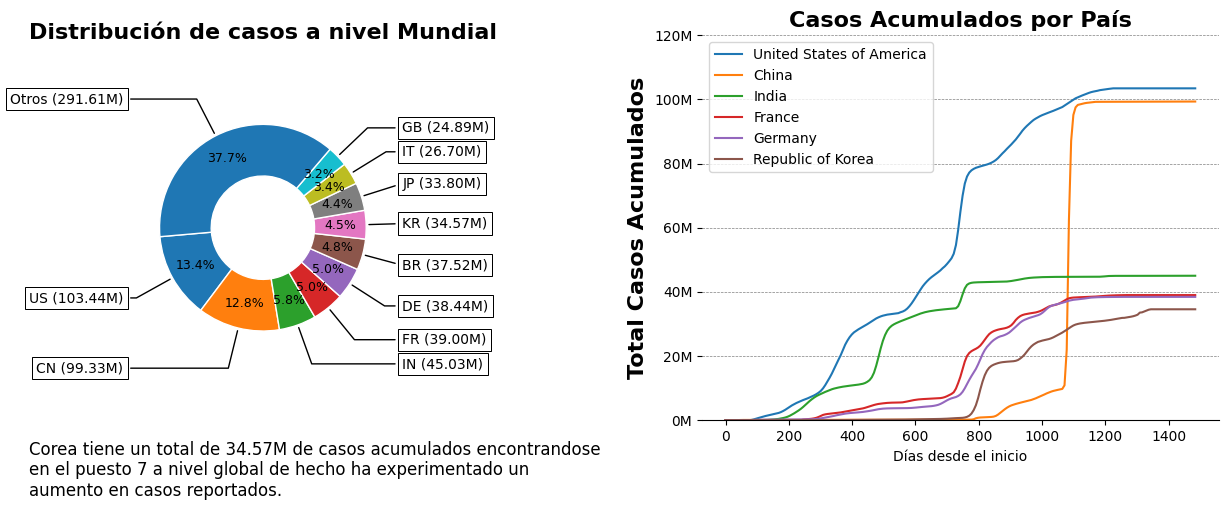

In [82]:

# ahora gráficamos

data= top_10_paises

def format_labels(x, decimals=1):
    pais = str(x)[:17]  # Tomar los primeros 3 caracteres del índice
    total = top_10_paises.loc[x]  # Obtener el total de casos para el país
    total_formatted = f'{total / 1e6:.{decimals}f}M'  # Formatear el total con decimales
    return f'{pais} ({total_formatted})'

fig, axs = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [1, 2]})
fig.subplots_adjust(wspace=0.8)
wedges, texts, autotexts = axs[0].pie(top_10_paises, autopct='%1.1f%%',textprops={'fontsize': 9}, pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, (p, t) in enumerate(zip(wedges, texts)):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    label = format_labels(top_10_paises.index[i],decimals=2)
    axs[0].annotate(label, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


axs[0].set_title("Distribución de casos a nivel Mundial", fontsize=16, fontweight='bold',  y=1.20)

# Función para formatear las etiquetas del eje y
def format_millions(value, pos):
    return f'{value / 1e6:.0f}M'

# Crear el gráfico de líneas
for pais in top_5_paises.index:
    days_since_start = (total_acumulado_top_5.columns - total_acumulado_top_5.columns[0]).days
    axs[1].plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais)

# Configuración adicional
axs[1].set_xlabel('Días desde el inicio')
axs[1].set_ylabel('Total Casos Acumulados',fontsize=16, fontweight='bold')
axs[1].legend()
axs[1].set_title('Casos Acumulados por País', fontsize=16, fontweight='bold')
axs[1].grid(False)
axs[1].spines[['top', 'right', 'left']].set_visible(False)
axs[1].yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')


# Formatear las etiquetas del eje y en millones
formatter = FuncFormatter(format_millions)
axs[1].yaxis.set_major_formatter(formatter)

# Establecer límites en el eje y
axs[1].set_ylim(0, 120e6)

descripcion =(
    "Corea tiene un total de 34.57M de casos acumulados encontrandose\n"
     "en el puesto 7 a nivel global de hecho ha experimentado un\n"
     "aumento en casos reportados."

)

fig.text(0.05, 0.01, descripcion, fontsize=12, color='black', va= 'center')

# Mostrar el gráfico
plt.show()

## La gráfica anterior nos muestra el total de casos acumulados en los países teniendo el cuenta el top 10 que hemos hecho anteriormente.
## Corea tiene un total de 34.57M de casos acumulados encontrandose en el puesto 7 a nivel global de hecho ha experimentado un aumento en casos reportados.
##Hay que tener en cuenta que es un país con una población alta y una densidad de población muy llamativa por tanto con un virus que es tan facil de transmitir esto puede significar un número de contagios alto.

#Pregunta 2
# ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19  a lo largo del tiempo?

In [83]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46040 entries, 0 to 46039
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      46040 non-null  datetime64[ns]
 1   Country_code       46040 non-null  object        
 2   Country            46040 non-null  object        
 3   New_cases          46040 non-null  int64         
 4   Cumulative_cases   46040 non-null  int64         
 5   New_deaths         46040 non-null  int64         
 6   Cumulative_deaths  46040 non-null  int64         
 7   lethality_rate     46040 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.8+ MB


In [84]:
#agrupamos por país y fecha osea Country y Date reported para obtener
# el valor de la columna cumulative_cases
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()

In [85]:
grouped_df

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21,2024-01-28
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,228975.0,229263.0,229367.0,229703.0,230075.0,230375.0,230642.0,230875.0,231072.0,231329.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,334408.0,334450.0,334506.0,334555.0,334596.0,334596.0,334653.0,334752.0,334818.0,334863.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.0,...,271991.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,349302.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0


In [86]:
#reiniciamos el indice
grouped_df = grouped_df.reset_index()

#configuramos para que el indice sea la columna Country
grouped_df = grouped_df.set_index('Country')

#Filtro los registros del país que quiero analizar
grouped_df = grouped_df.loc[['Republic of Korea']]

#Creo una variable fechas que tendra todas las columnas de grouped_df,
# que son las fechas reportadas en el país.
fechas = grouped_df.columns

# con la variable fechas voy a calcular la diferencia de valores entre la columna
#anterior y la columna actual y reemplazaré el valor de la columna actual
#por la diferencia calculada, realizaremos esto para todas las fechas,
# guardaremos el resultado en new_cases.
new_cases = grouped_df[fechas].diff(axis=1).fillna(0).sum(axis=0)

#elimino de new_cases los valores menores a 0 osea negativos
new_cases = new_cases[new_cases > 0]
new_cases


Date_reported
2020-01-26         2.0
2020-02-02        12.0
2020-02-09        12.0
2020-02-16         3.0
2020-02-23       526.0
                ...   
2023-08-13     81573.0
2023-08-20    281745.0
2023-08-27    282263.0
2023-09-03    256742.0
2023-09-10    135331.0
Length: 190, dtype: float64

In [87]:
#convierto el formato a datetime
new_cases.index = pd.to_datetime(new_cases.index)


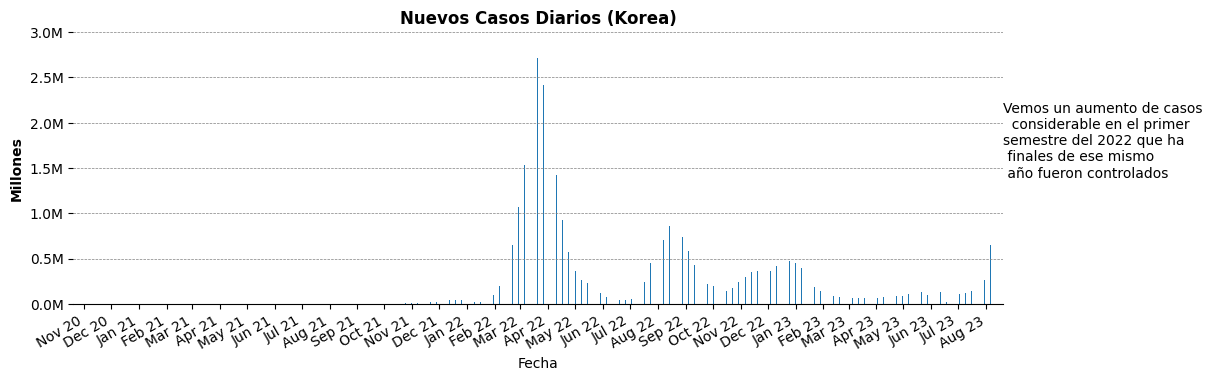

In [88]:
#ahora gráfico
fecha_inicio = '2021-10-20'
fecha_fin = '2023-08-20'
# Filtra los datos para incluir solo las fechas dentro del rango deseado
new_cases_filtrado = new_cases.loc[fecha_inicio:fecha_fin]
# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(new_cases_filtrado.index, new_cases_filtrado.values / 1e6)
# Formatea el eje x para que muestre solo meses
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%b %y')))
ax.set_ylim(0, 2.9)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}M'))
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')
# Establece los límites del eje x
ax.set_xlim(datetime.datetime(2020,10,20), datetime.datetime(2023,8,20))

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
fig.autofmt_xdate()
# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Millones', fontweight='bold')
ax.set_title('Nuevos Casos Diarios (Korea)',fontweight='bold')
ax.set_ylim(0, 3.0)


descripcion = ("Vemos un aumento de casos\n  considerable en el primer \n"
               "semestre del 2022 que ha \n finales de ese mismo\n año fueron controlados"
)
ax.text(1.0, 0.6, descripcion, transform=ax.transAxes, fontsize=10, va='center', ha='left',multialignment='left')

plt.show()

### ##La gráfica anterior nos muestra el avance de los nuevos casos diarios reportados, como vemos hubo un pico considerable en dede marzo de 2022 teniendo su maximo en abril de 2022 que posteriormente fue bajando y se mantuvo hasta el primer sementre del 2023 teniendo una remontada en agosto del mismo año llegando a sobre pasar los 600k afectados. ebemos tomar en cuenta que para estas fechas donde se han disparado de nuevo los casos reportados son fechas donde las restricciones han mermado o se han retirado.

# ¿Cuál es la evolución del índice de letalidad comparado con los países de índices históricos más elevados?

In [89]:
#Usando el dataframe df_covid_limpio, vamos a agrupar
#por país y fecha en formato (año-mes) para obtener el
# registro con mayor índice de letalidad en ese mes,
# guardamos el resultado en result

#Lethality Rate by Country
def get_max_row(group, column):
    return group.loc[group[column].idxmax()]

result = df_covid_limpio.groupby(['Country', df_covid_limpio['Date_reported'].dt.to_period("M")]).apply(lambda group: get_max_row(group, 'lethality_rate'))

#reiniciamos el índice de result.
result.reset_index(drop=True, inplace=True)

#Luego agrupamos el df result por nombre de país y
#obtenemos el indice de letalidad promedio por cada país,
#nos quedamos con los 4 mayores y guardamos el resultado
# en top_4_paises.
top_4_paises = result.groupby('Country')['lethality_rate'].mean().nlargest(4).index


#Luego filtramos el df result para quedarnos únicamente con los registros cuyo país
#está en la lista top_4_paises.
result = result[result['Country'].isin(top_4_paises)]
result

#repetimos los 2 primeros pasos pero filtrando el país
# que estamos analizando, guardamos en result_pais.
result_pais = df_covid_limpio[df_covid_limpio['Country'] == 'Republic of Korea'].groupby(df_covid_limpio['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
result_pais.reset_index(drop=True, inplace=True)

#Finalmente juntamos result y result_pais en un único df
result_final = pd.concat([result, result_pais])
result_final

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
6390,2020-02-23,MX,Mexico,1,1,0,0,0.000000
6391,2020-03-29,MX,Mexico,1214,2117,24,28,1.322626
6392,2020-04-26,MX,Mexico,9264,22764,1453,2758,12.115621
6393,2020-09-06,MX,Mexico,38873,693646,3556,86058,12.406617
6394,2020-10-04,MX,Mexico,32636,824996,2586,97647,11.836057
...,...,...,...,...,...,...,...,...
44,2023-09-03,KR,Republic of Korea,256742,34436542,0,35812,0.103994
45,2023-10-01,KR,Republic of Korea,0,34571873,0,35934,0.103940
46,2023-11-05,KR,Republic of Korea,0,34571873,0,35934,0.103940
47,2023-12-03,KR,Republic of Korea,0,34571873,0,35934,0.103940


In [90]:
result.head(5)


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
6390,2020-02-23,MX,Mexico,1,1,0,0,0.000000
6391,2020-03-29,MX,Mexico,1214,2117,24,28,1.322626
6392,2020-04-26,MX,Mexico,9264,22764,1453,2758,12.115621
6393,2020-09-06,MX,Mexico,38873,693646,3556,86058,12.406617
6394,2020-10-04,MX,Mexico,32636,824996,2586,97647,11.836057


In [91]:
result_pais.head(6)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-19,KR,Republic of Korea,1,1,0,0,0.000000
1,2020-02-23,KR,Republic of Korea,526,556,3,3,0.539568
2,2020-03-29,KR,Republic of Korea,686,9583,48,152,1.586142
3,2020-04-26,KR,Republic of Korea,67,10728,8,242,2.255779
4,2020-05-24,KR,Republic of Korea,140,11190,4,266,2.377122
5,2020-06-07,KR,Republic of Korea,308,11776,3,273,2.318274


In [92]:
result_final

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
6390,2020-02-23,MX,Mexico,1,1,0,0,0.000000
6391,2020-03-29,MX,Mexico,1214,2117,24,28,1.322626
6392,2020-04-26,MX,Mexico,9264,22764,1453,2758,12.115621
6393,2020-09-06,MX,Mexico,38873,693646,3556,86058,12.406617
6394,2020-10-04,MX,Mexico,32636,824996,2586,97647,11.836057
...,...,...,...,...,...,...,...,...
44,2023-09-03,KR,Republic of Korea,256742,34436542,0,35812,0.103994
45,2023-10-01,KR,Republic of Korea,0,34571873,0,35934,0.103940
46,2023-11-05,KR,Republic of Korea,0,34571873,0,35934,0.103940
47,2023-12-03,KR,Republic of Korea,0,34571873,0,35934,0.103940


Text(1.05, 0.5, 'Aunque a principios del 2022 se detecto\nuna subida importante de casos diarios \nreportados no significo una alsa en\nel indice de letalidad sino que más bien\nvemos desde el segundo sementre del \n 2022 cifras positivas y constantes')

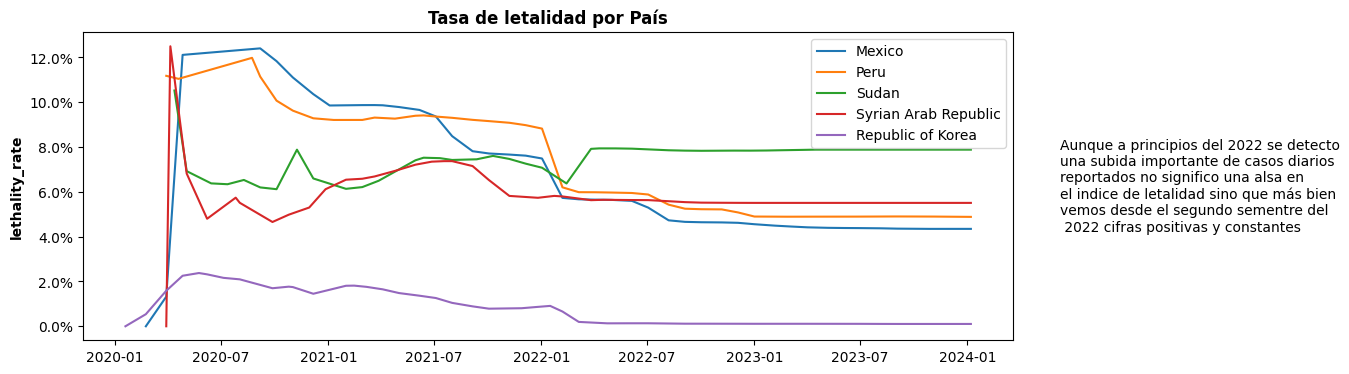

In [93]:
fig, ax = plt.subplots(figsize=(12, 4))
for pais in result_final['Country'].unique():
    country_data = result_final[result_final['Country'] == pais]
    ax.plot(country_data['Date_reported'], country_data['lethality_rate'], label=pais)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y / 100:.1%}'))

    ax.set_ylabel('lethality_rate', fontweight='bold')
    ax.set_title('Tasa de letalidad por País',fontweight='bold')
    ax.legend()

descripcion = ("Aunque a principios del 2022 se detecto\nuna subida importante de casos diarios \nreportados no significo una alsa en\n"
               "el indice de letalidad sino que más bien\nvemos desde el segundo sementre del \n 2022 cifras positivas y constantes"
)
ax.text(1.05, 0.5, descripcion, transform=ax.transAxes, fontsize=10, va='center', ha='left',multialignment='left')

#Desde una perspectiva demográfica ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

In [94]:
#Usando el dataframe df_covid_limpio, vamos a
#seleccionar los registros hasta '2020-12-31' y
# guardarlos en df_filtrado.

df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported']<= '2020-12-31']

In [95]:
#Agrupamos df_filtrado por nombre de país y
#obtenemos el indice de letalidad promedio por
# cada país, lo guardamos en df_agrupado.
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False)['lethality_rate'].mean()

In [96]:
#Luego realizamos un inner join entre df_agrupado
# y df_population_limpio a través de la columna
#Country_code, guardamos el resultado en df_final.

df_final = pd.merge(df_agrupado, df_population_limpio, on='Country_code', how='inner')

In [97]:
#filtramos las columnas que queremos
columnas_seleccionadas = ['Edad_Media','lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']

df_final = df_final[columnas_seleccionadas]
df_final

,Edad_Media,lethality_rate,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,41,3.745537,76000,38000,37000,162,83
1,31,0.488321,9211000,6443000,2767000,129,79
2,16,2.909761,37769000,19090000,18679000,58,63
3,33,5.041373,92000,43000,48000,209,78
4,35,0.000000,15000,7000,7000,174,76
...,...,...,...,...,...,...,...
212,18,0.000000,31546000,15953000,15593000,59,65
213,16,1.080827,294000,139000,154000,785,77
214,26,2.297390,58087000,28207000,29879000,47,66
215,16,2.606602,18380000,9066000,9314000,24,62


In [98]:
#aplicamos el método feature importances con
#Random Forest para descubrir cuales de los
#atributos en df_final consiguen explicar mejor
#el índice de letalidad de la columna lethality_rate
#guardamos este resultado en la variable feature_importances.
X = df_final.drop(['lethality_rate'], axis=1)
y = df_final['lethality_rate']
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Edad_Media            0.227702
Population_Density    0.210275
Female_Population     0.167846
Life_Expectancy       0.144230
Total_Population      0.125395
Male_Population       0.124552
dtype: float64

Text(1.05, 0.5, "Según el análisis de importancia\nla carácteristica más relevante es\n'Edad media' seguida por la\n'Densidad de población'")

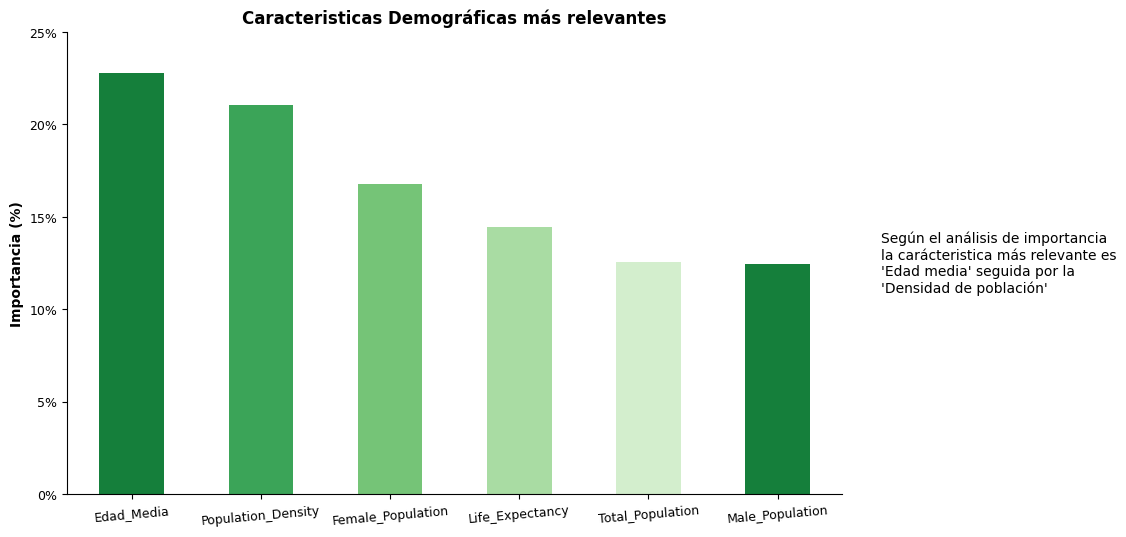

In [99]:

# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
colores = plt.cm.Greens_r(np.linspace(0.2, 0.8, 5))

feature_importances = feature_importances.sort_values(ascending=False)
feature_importances.plot(kind='bar', color=colores, ax=ax)
ax.set_ylabel('Importancia (%)', fontweight='bold')
ax.set_title('Caracteristicas Demográficas más relevantes',fontweight='bold')

#Formatear a %
def percentager_formatter (x, _):
  rounded_value = round(x*100, 0)
  return f'{int(rounded_value):,}%'
ax.yaxis.set_major_formatter(FuncFormatter(percentager_formatter))

ax.tick_params(axis='y', labelsize=9)
ax.tick_params(axis='x', rotation=5, labelsize=9)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylim(0, 0.25)



conclusion_text = (
    "Según el análisis de importancia\n"
    "la carácteristica más relevante es\n"
    "'Edad media' seguida por la\n"
    "'Densidad de población'"
)
ax.text(1.05, 0.5, conclusion_text, transform=ax.transAxes, fontsize=10, va='center', ha='left',multialignment='left')

##En la anterior gráfica se muestra qué características influyen en el nivel de letalidad, teniendo en cuenta variables como la edad media, la densidad de población, la expectación de vida entre otras.

#En el caso de Corea la variable más destacada en la edad media, esto puede deberse a que el covid afectó en mayor medida a personas mayores seguida por la densidad de población siendo esta  de 515 habitantes por km2 aproximadamente.
